In [8]:
import numpy as np
from senior_sem import generate_transmission, generate_satellite

In [40]:
from numba import njit

In [41]:
@njit()
def horizon(lat,lon,satcords):
    u,v,w=satcords
    phi=np.deg2rad(lat)
    gamma=np.deg2rad(lon)
    a = b = 6_378_137.00
    c = 6_356_752.314245
    f = 1/298.257223563
    e_sq =  2*f-f**2
    return (a**3*b**2*(e_sq - 1)**2*(-e_sq*np.sin(phi)**2 + 1)**(7/2)*np.sin(phi)**2 + a**3*c**2*(-e_sq*np.sin(phi)**2 + 1)**(7/2)*np.sin(gamma)**2*np.cos(phi)**2 + a**2*b**2*w*(e_sq - 1)*(e_sq*np.sin(phi)**2 - 1)**4*np.sin(phi) - a**2*c**2*v*(e_sq*np.sin(phi)**2 - 1)**4*np.sin(gamma)*np.cos(phi) + a*b**2*c**2*(-e_sq*np.sin(phi)**2 + 1)**(7/2)*np.cos(gamma)**2*np.cos(phi)**2 - b**2*c**2*u*(e_sq*np.sin(phi)**2 - 1)**4*np.cos(gamma)*np.cos(phi))/(a*b**2*c**2*(-e_sq*np.sin(phi)**2 + 1)**(9/2))

In [42]:
@njit()
def horizon_diff_gamma(lat,lon,satcords):
    u,v,w=satcords
    phi=np.deg2rad(lat)
    gamma=np.deg2rad(lon)
    a = b = 6_378_137.00
    c = 6_356_752.314245
    f = 1/298.257223563
    e_sq =  2*f-f**2
    return (-1/2*a**3*(np.sin(2*gamma - phi) + np.sin(2*gamma + phi)) + a**2*v*np.sqrt(-e_sq*np.sin(phi)**2 + 1)*np.cos(gamma) + (1/2)*a*b**2*(np.sin(2*gamma - phi) + np.sin(2*gamma + phi)) - b**2*u*np.sqrt(-e_sq*np.sin(phi)**2 + 1)*np.sin(gamma))*np.cos(phi)/(a*b**2*(e_sq*np.sin(phi)**2 - 1))

In [72]:
@njit()
def newton(lat,lon,satcords):
    lon_0=lon+90
    lonp=0
    lonm=0
    for i in range(10**9):
        lon_1=lon_0-horizon(lat,lon,satcords)/horizon_diff_gamma(lat,lon,satcords)
        if -1<horizon(lat,lon_1,satcords)<1:
            lonp=lon_1
            print(i)
            break
        else:
            lon_0=lon_1
    else:
        print(lon_1)

    lon_0=lon-90
    for i in range(10**9):
        lon_1=lon_0-horizon(lat,lon,satcords)/horizon_diff_gamma(lat,lon,satcords)
        if -1<horizon(lat,lon_1,satcords)<1:
            lonm=lon_1
            print(i)
            break
        else:
            lon_0=lon_1
    else:
        print(lon_1)
    return lonp,lonm


(22353721.854053076, 42443809.29054539, 30683278.648192514)

In [75]:
ll=newton(25,25,satcords)

91
80


In [76]:
ll

(-29.15449528382458, -191.91863171728)

In [1]:
import shapely

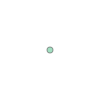

In [4]:
shapely.geometry.Point([-191,25])

In [67]:
np.deg2rad(np.rad2deg(np.deg2rad(ll[1])))

-3.1855269819376484

In [5]:
import ipyleaflet

In [1]:
from ipyleaflet import Map, Marker, MeasureControl

center = (25,25)

m = Map(center=center, zoom=1)
marker = Marker(location=center, draggable=True,color="red")
marker0 = Marker(location=(25,360-191), draggable=True)
marker1 = Marker(location=(25,360-29), draggable=True)
m.add(marker)
m.add(marker0)
m.add(marker1)
measure = MeasureControl(
    position='bottomleft',
    active_color = 'orange',
    primary_length_unit = 'kilometers'
)
m.add(measure)
display(m)
ipyleaflet.
# Now that the marker is on the Map, you can drag it with your mouse,
# it will automatically update the `marker.location` attribute in Python

# You can also update the marker location from Python, that will update the
# marker location on the Map:
# marker.location = (50, 356)

Map(center=[25, 25], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [53]:

horizon(25,-21.52526309146065,satcords=satcords)

-1.7126458394067077

In [58]:
tran = generate_transmission(25,25)
sat=generate_satellite(tran)
satcords=sat["coords"]

In [65]:
tran

(27.713718606765493,
 26.18995639402187,
 numpy.datetime64('2024-01-07T15:23:35.241476204'))

In [11]:
sol_array=np.zeros((181,359))
lat_domain = np.arange(-90,91)
lon_domain = np.arange(-180,179)
for i in range(lat_domain.size):
    for j in range(lat_domain.size):
        sol_array[i,j]= horizon(lat_domain[i],lon_domain[j],satcords=satcords)

In [13]:
import seaborn as sns

In [6]:
lat_domain = np.arange(-90,91)
lon_domain = np.arange(-180,179)

359

In [24]:
manip=sol_array.copy()

In [25]:
manip=1/(1-manip)

In [27]:
manip.min()

-5736.355140121539

In [28]:
manip[(manip>1) & (manip<-1)]=0

<Axes: >

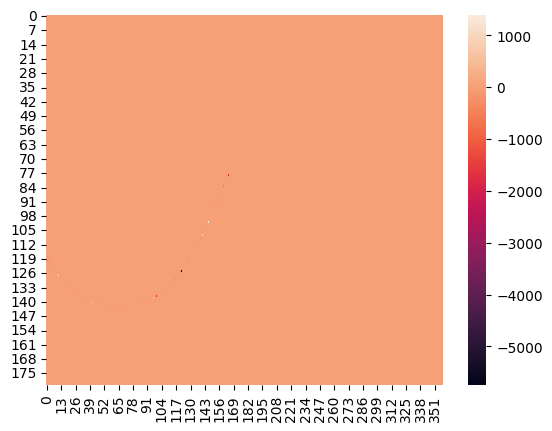

In [29]:
sns.heatmap(manip)